<a href="https://colab.research.google.com/github/shuler7/DataMiningPublic/blob/main/SpaceTitanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import pandas as pd

In [8]:
df = pd.read_csv("https://github.com/shuler7/DataMiningPublic/raw/main/spaceship_titanic_train.csv")

In [9]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [37]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported', 'age_cat', 'from_earth'],
      dtype='object')

In [29]:
df[["CryoSleep","Transported"]].value_counts()

,,count
CryoSleep,Transported,
False,False,3650
True,True,2483
False,True,1789
True,False,554


In [22]:
df["age_cat"] = pd.cut( df["Age"], bins = [0,19,27,38,100], labels = ["Young", "Adult", "Middle_aged", "Old"])

In [42]:
df["Transported"].value_counts(normalize=True)

,proportion
Transported,
True,0.503624
False,0.496376


In [43]:
df.groupby("HomePlanet", observed=True)["Transported"].value_counts(normalize=True)

HomePlanet  Transported
Earth       False          0.576054
            True           0.423946
Europa      True           0.658846
            False          0.341154
Mars        True           0.523024
            False          0.476976
Name: proportion, dtype: float64

In [44]:
df.groupby("Destination", observed=True)["Transported"].value_counts(normalize=True)

Destination    Transported
55 Cancri e    True           0.610000
               False          0.390000
PSO J318.5-22  True           0.503769
               False          0.496231
TRAPPIST-1e    False          0.528825
               True           0.471175
Name: proportion, dtype: float64

In [50]:
df.groupby(["Destination","VIP","HomePlanet"], observed=True)["Transported"].value_counts(normalize=True)

Destination    VIP    HomePlanet  Transported
55 Cancri e    False  Earth       True           0.507485
                                  False          0.492515
                      Europa      True           0.711276
                                  False          0.288724
                      Mars        True           0.608466
                                  False          0.391534
               True   Europa      False          0.603175
                                  True           0.396825
PSO J318.5-22  False  Earth       False          0.500722
                                  True           0.499278
                      Europa      True           1.000000
                      Mars        False          0.538462
                                  True           0.461538
               True   Europa      False          0.500000
                                  True           0.500000
                      Mars        False          0.750000
                                  True           0.250000
TRAPPIST-1e    False  Earth       False          0.610891
                                  True           0.389109
                      Europa      True           0.636856
                                  False          0.363144
                      Mars        True           0.524223
                                  False          0.475777
               True   Europa      True           0.607143
                                  False          0.392857
                      Mars        False          0.854545
                                  True           0.145455
Name: proportion, dtype: float64

# Building a Classifier

In [51]:
df["prediction"] = df["HomePlanet"] == "Europa"

In [52]:
df["prediction"].value_counts()

,count
prediction,
False,6562
True,2131


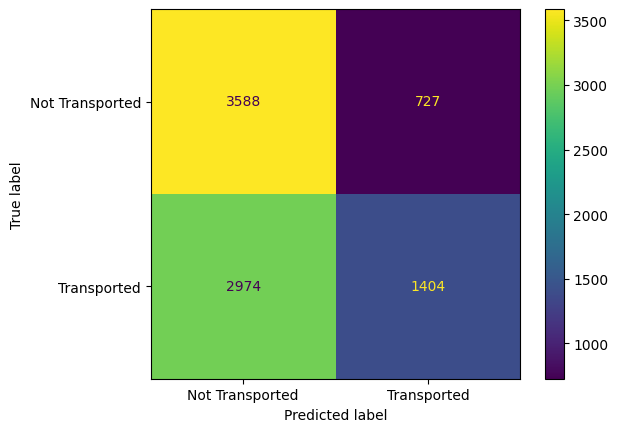

In [79]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix( df["Transported"], df["prediction"])
ConfusionMatrixDisplay( cm, display_labels=["Not Transported", "Transported"]).plot()


In [80]:
tn, fp, fn, tp = cm.ravel()
tn, fp, fn, tp

(3588, 727, 2974, 1404)

In [98]:
# True Positive Rate Recall / Sensitivity : the proportion of the positives that were detected
# tp / (tp + fn)
recall = tp / df["Transported"].value_counts()[True]
recall

0.32069438099588854

In [96]:
# True Negative Rate : the proportion of the negatives that were detected
# tn / (tn + fp)
tn / df["Transported"].value_counts()[False]

0.8315179606025492

In [99]:
# Positive Predictive Value / Precision: Proportion that
# we said got transported truly got transported
# tp / (tp + fp)

precision = tp / df["prediction"].value_counts()[True]
precision

0.65884561238855

In [97]:
# Negative Predictive Value : Proportion that
# we said NOT transported were NOT transported
# tn / (tn + fn)

tn / df["prediction"].value_counts()[False]

0.5467845169155745

In [91]:
# Accuracy: Proportion of predictions that were correct.
(tp + tn)/len(df.index)

0.5742551478200851

In [100]:
# F1 score
# 2*(recall)*(precision) / (recall + precision)
2*(recall)*(precision) / (recall + precision)

0.431402673221693